<a href="https://colab.research.google.com/github/Mkhan2317/Forecasting_Crypto_Using_Arima/blob/main/Arima_Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Time Series Analysis - Forecasting Crypto Values

## 0. Agenda:

1. Loading the data
2. Function for ARIMA Tuning
3. Runing Arima and Ploting Results
4. Runing the best model
5. Runing it all togehter
6. Streamlit App


In [ ]:
# pip install yfinance

### 1. Loading the data

In [ ]:
import pandas as pd
import numpy as np
import yfinance as yf
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from itertools import product
import warnings

# Ignore warnings
warnings.filterwarnings("ignore")

# Step 1: Pull BTC data for the last 3 months
btc_data = yf.download('BTC-USD', period='3mo', interval='1d')
btc_data = btc_data[['Close']].dropna()

[*********************100%***********************]  1 of 1 completed


In [ ]:
# Prepare train-test split (80% train, 20% test)
train_size = int(len(btc_data) * 0.8)
train, test = btc_data[:train_size], btc_data[train_size:]

### 2. Function for ARIMA Tuning

- ARIMA (AutoRegressive Integrated Moving Average): A time series forecasting model that combines AutoRegression (AR), Integration (I) (differencing to achieve stationarity), and Moving Average (MA) to capture patterns in historical data and make predictions.

- Usage: ARIMA is best suited for univariate time series data that is stationary or can be made stationary, modeling linear relationships between observations and past values or errors.

𝑝
p (AutoRegressive order): Number of past values (lags) used to predict the current value, determined using the Partial Autocorrelation Function (PACF).

𝑑
d (Differencing order): Number of times the data is differenced to make it stationary (removing trends or seasonality).

𝑞
q (Moving Average order): Number of past forecast errors included in the model, determined using the Autocorrelation Function (ACF).

In [ ]:
# Step 2: ARIMA model tuning
p_values = range(0, 4)  # Define the range for ARIMA(p,d,q)
d_values = range(0, 2)
q_values = range(0, 4)

def evaluate_arima_model(train, test, arima_order):
    try:
        model = ARIMA(train, order=arima_order)
        model_fit = model.fit()
        predictions = model_fit.forecast(steps=len(test))
        mse = mean_squared_error(test, predictions)
        return mse, model_fit
    except:
        return float('inf'), None

### 3. Runing Arima and Ploting Results

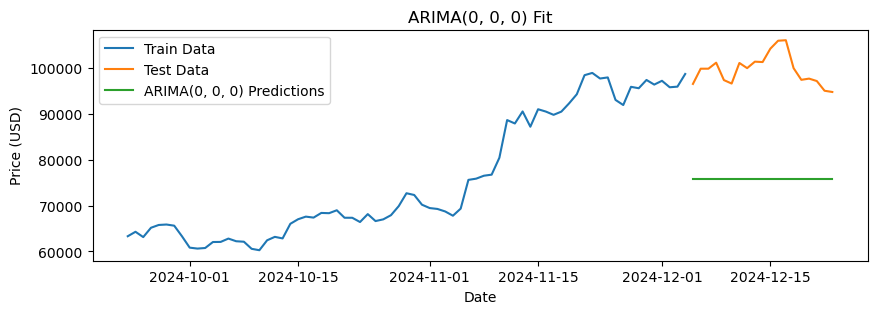

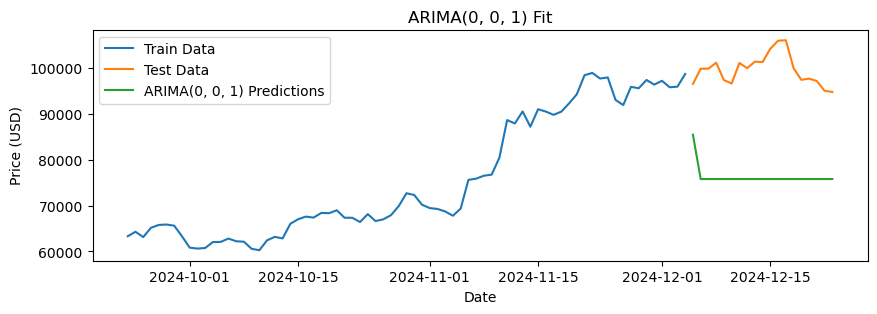

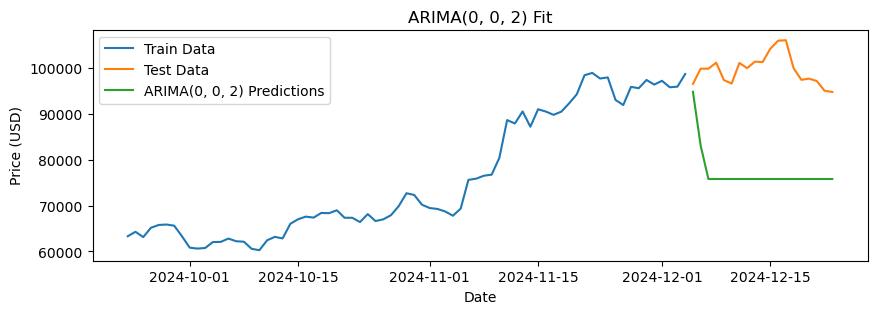

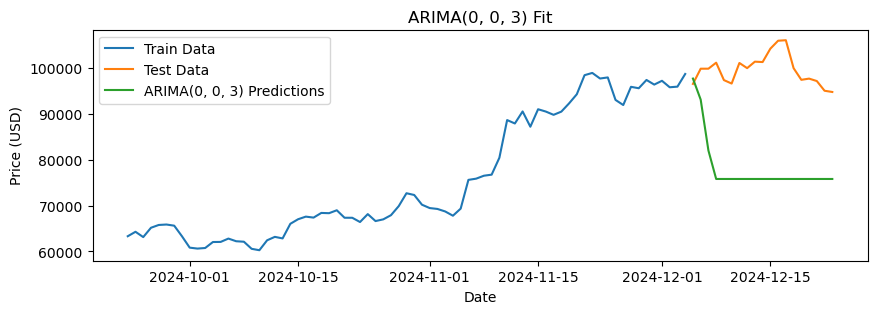

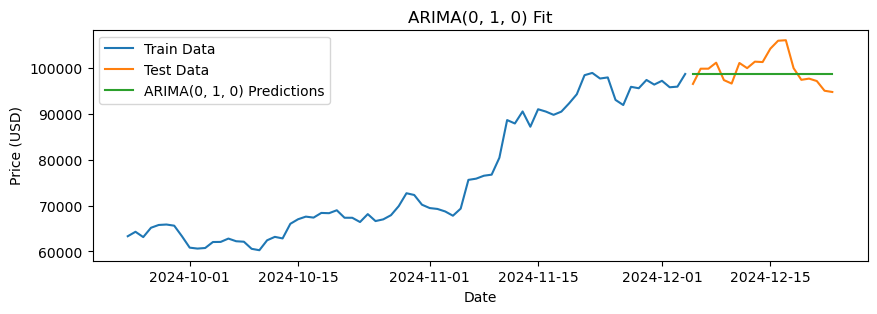

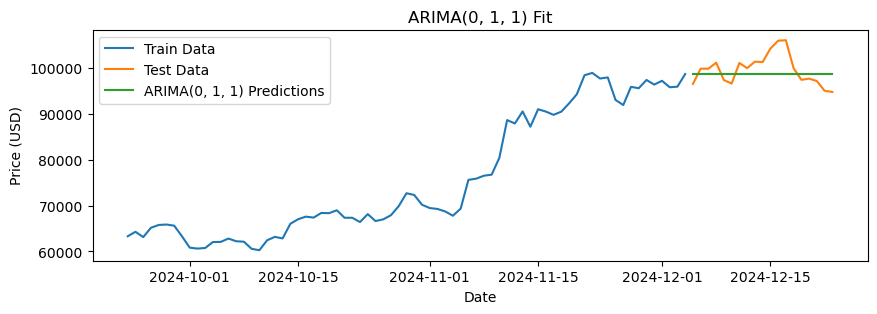

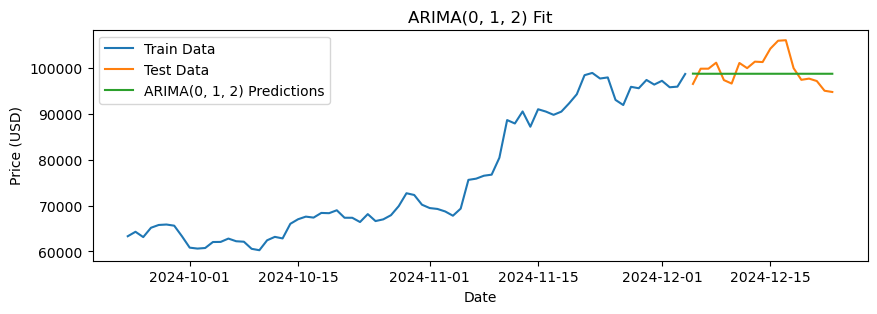

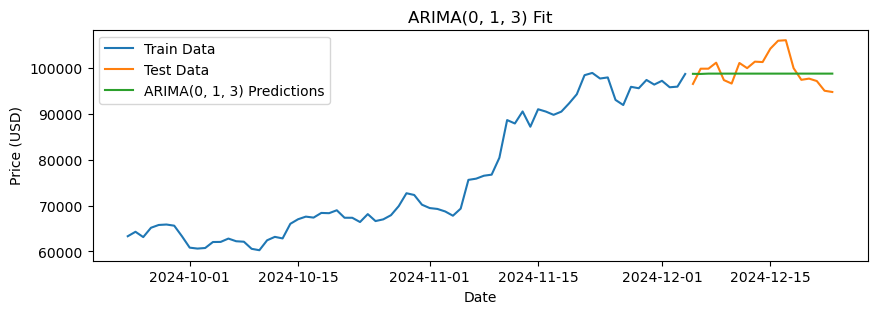

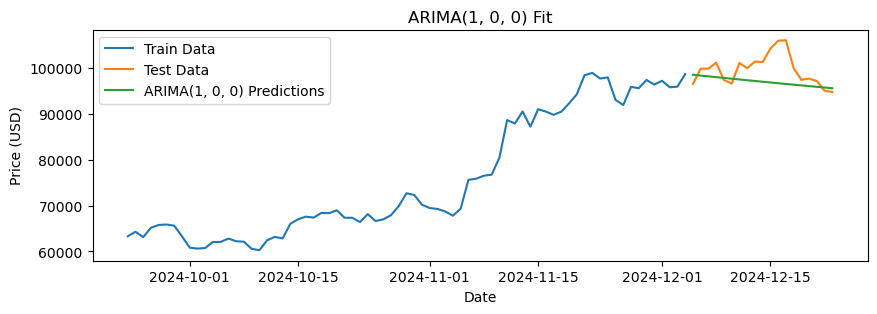

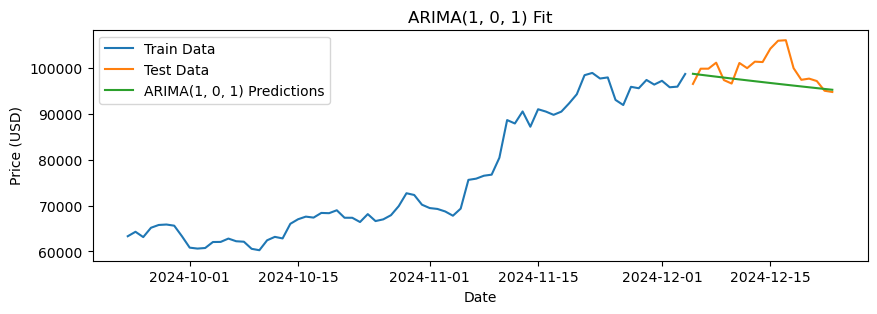

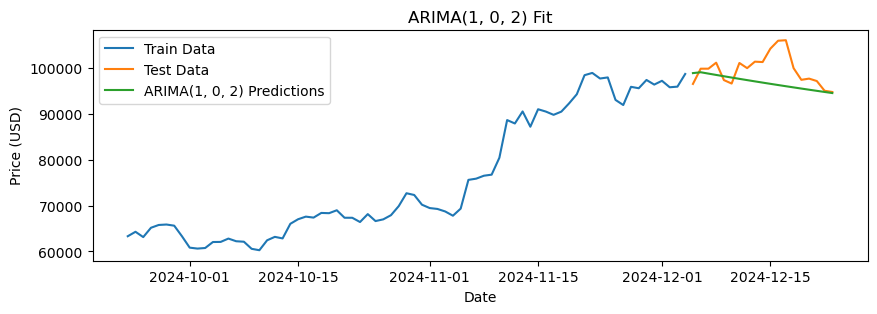

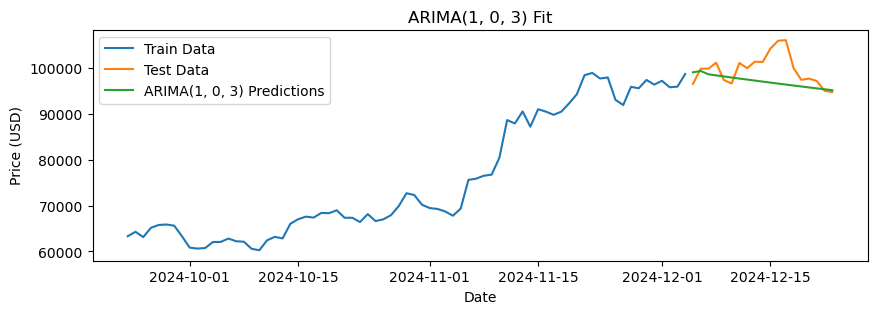

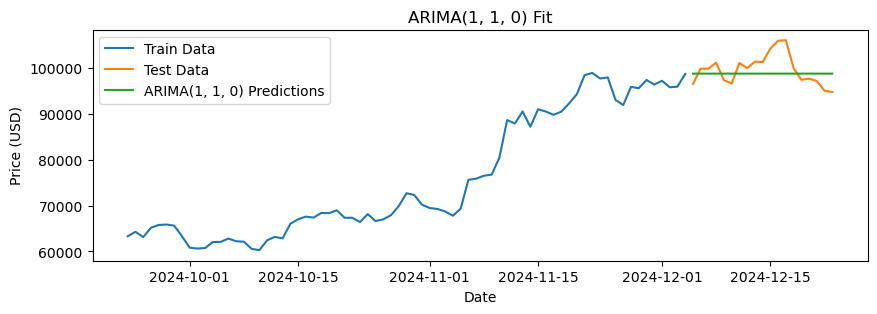

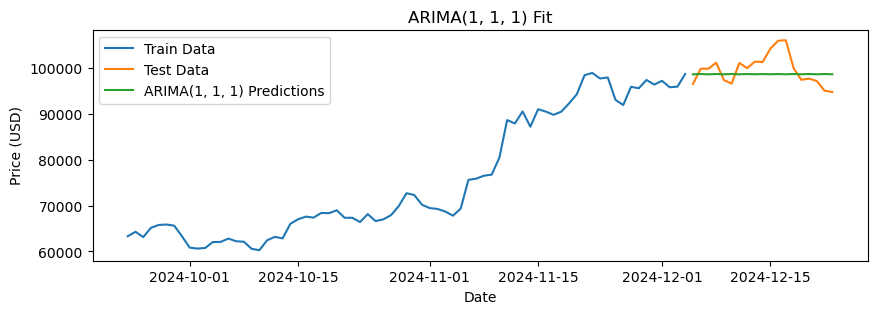

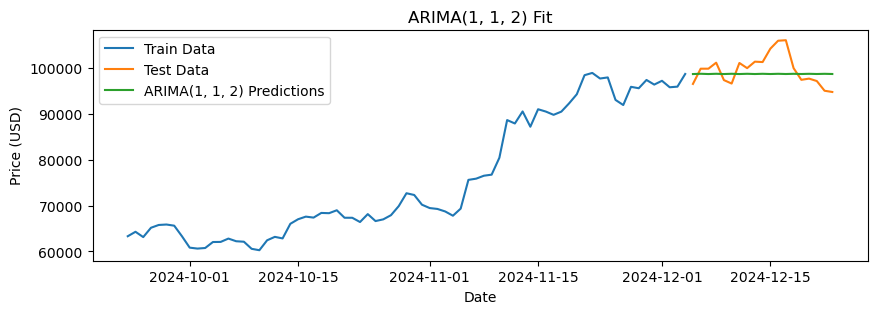

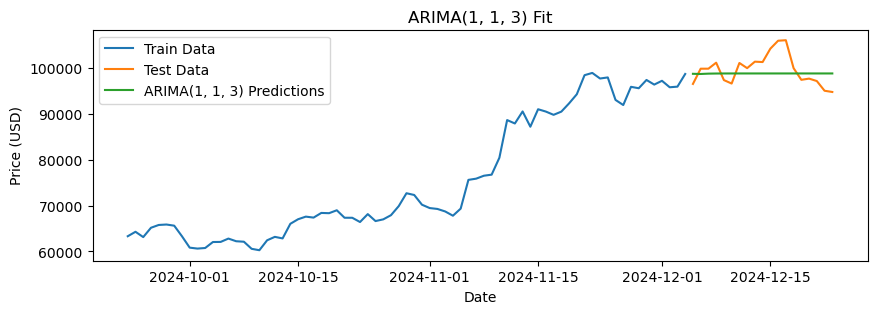

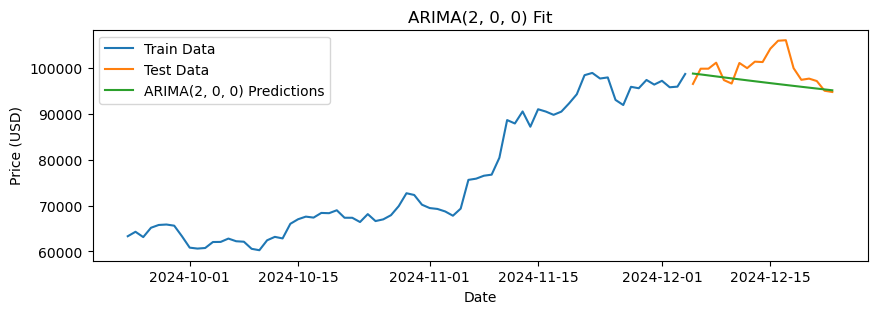

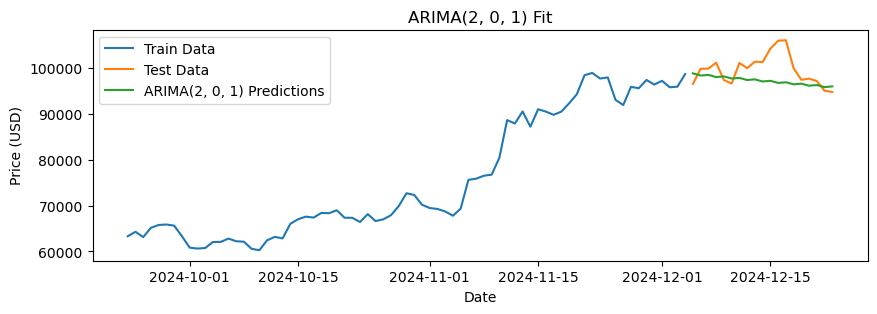

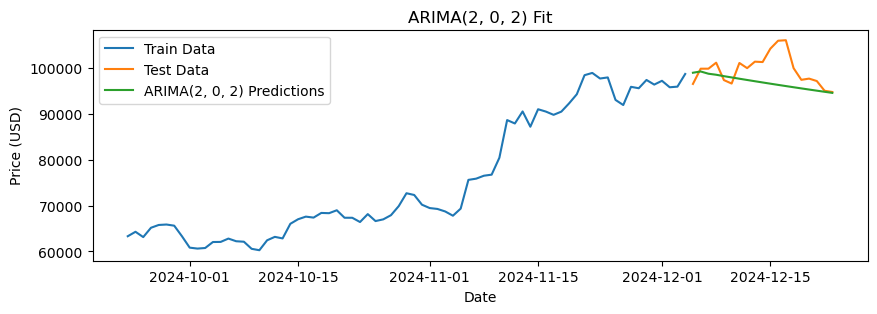

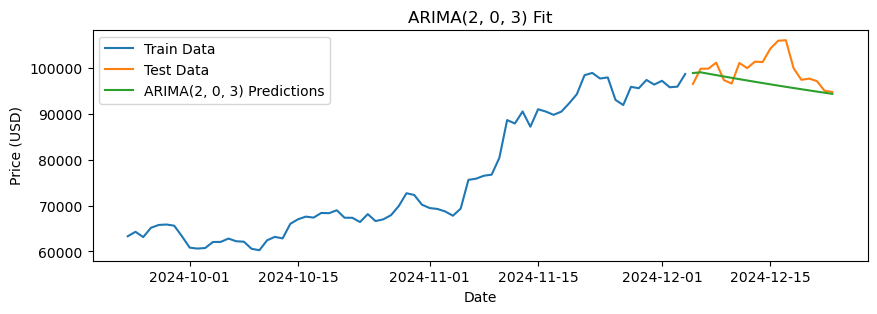

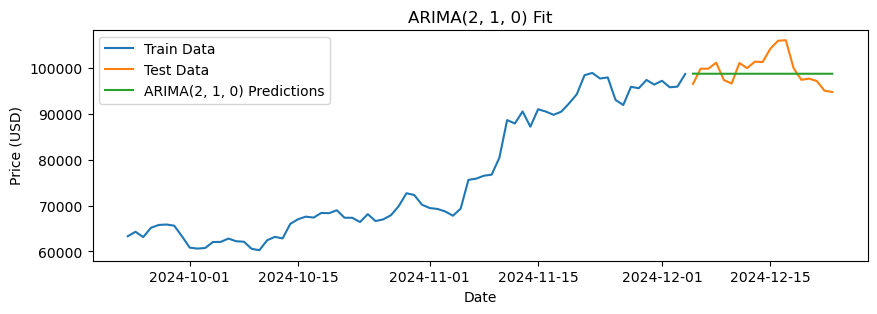

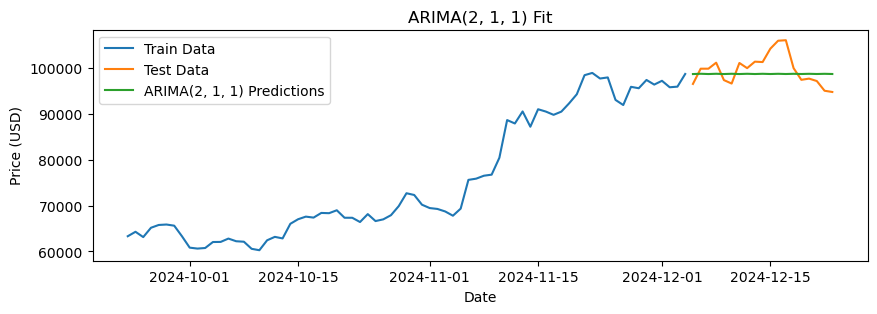

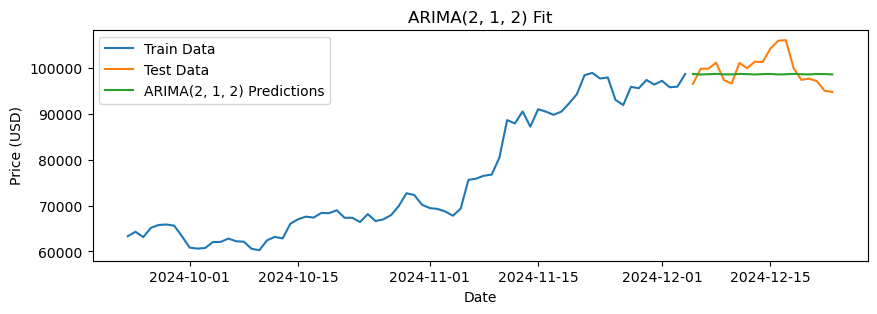

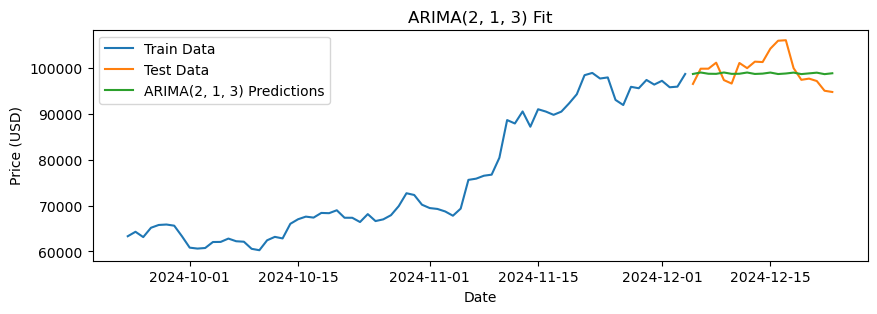

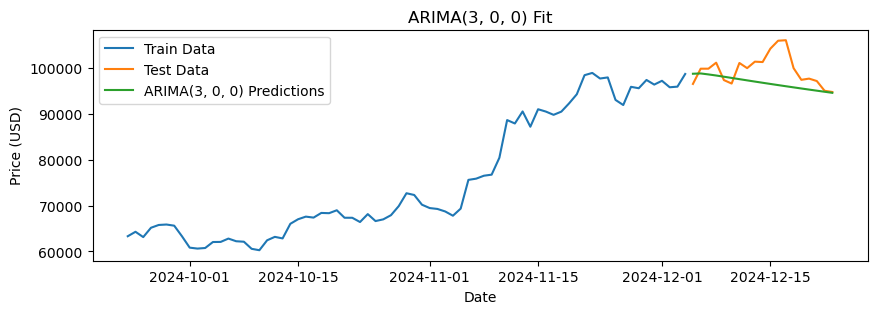

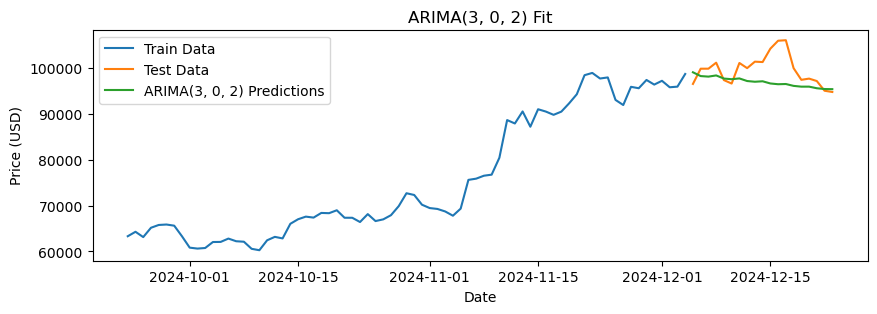

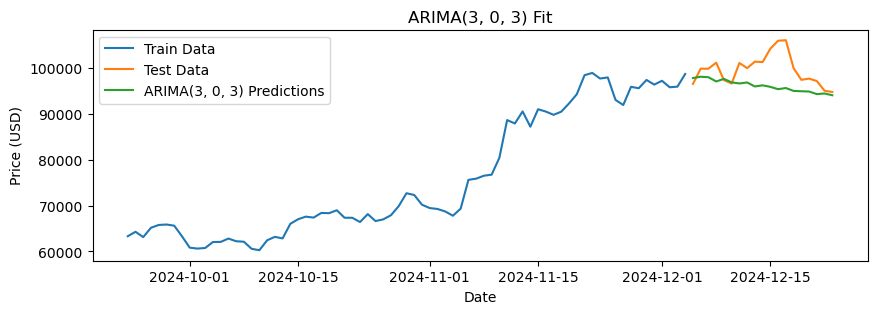

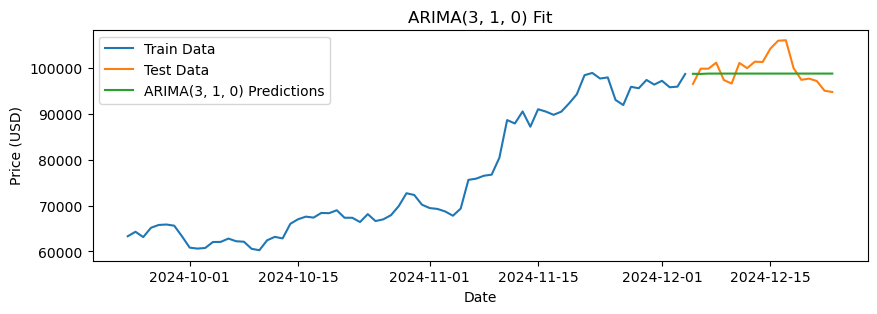

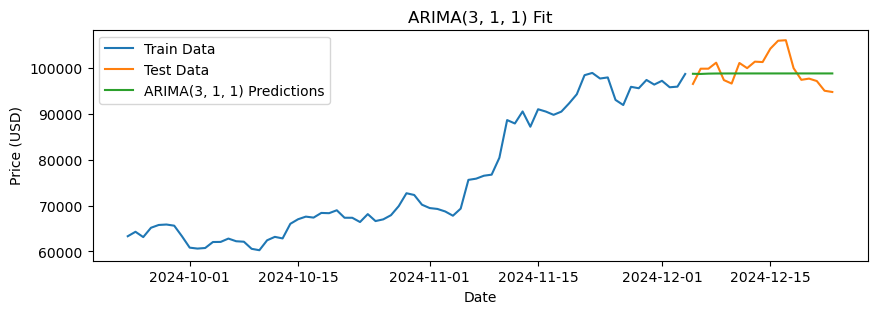

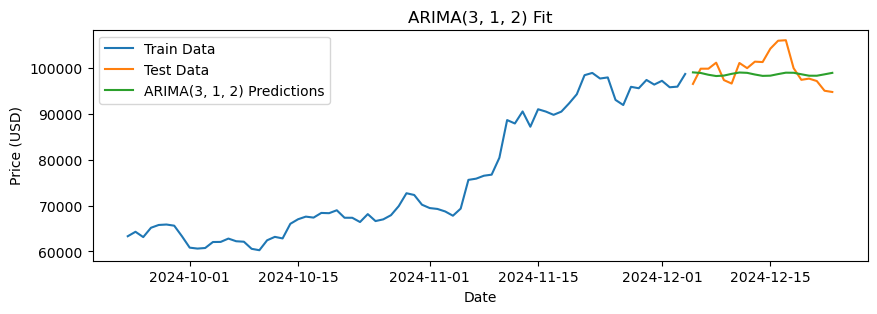

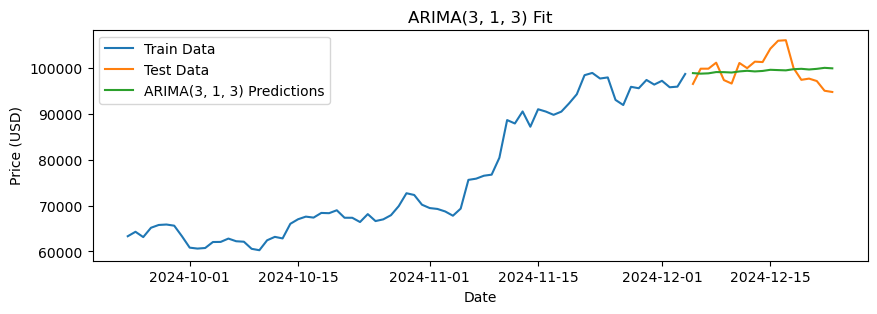

In [ ]:
results = []
for p, d, q in product(p_values, d_values, q_values):
    arima_order = (p, d, q)
    mse, model_fit = evaluate_arima_model(train['Close'], test['Close'], arima_order)
    results.append((arima_order, mse, model_fit))

    # Visualize each fit
    if model_fit is not None:
        plt.figure(figsize=(10, 3))
        plt.plot(train.index, train['Close'], label='Train Data')
        plt.plot(test.index, test['Close'], label='Test Data')
        plt.plot(test.index, model_fit.forecast(steps=len(test)), label=f'ARIMA{arima_order} Predictions')
        plt.title(f'ARIMA{arima_order} Fit')
        plt.xlabel('Date')
        plt.ylabel('Price (USD)')
        plt.legend()
        plt.show()

### 4. Runing the best model

Best ARIMA order: (3, 1, 3), MSE: 4154614.283956308


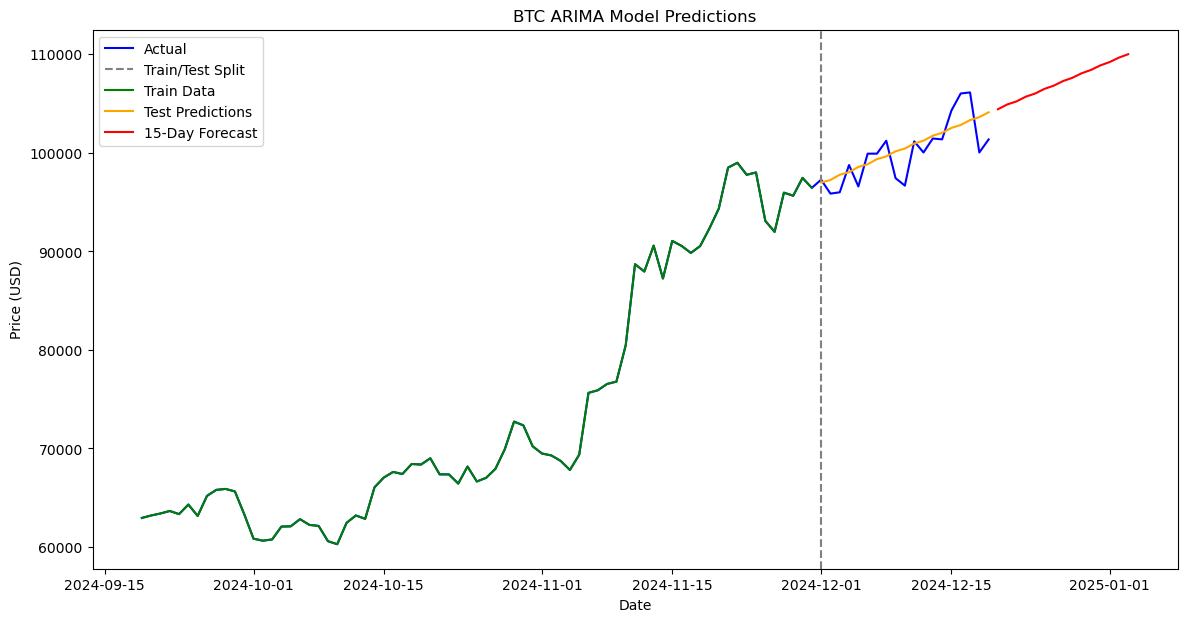

In [ ]:
# Select the best model
best_order, best_mse, best_model = min(results, key=lambda x: x[1])
print(f"Best ARIMA order: {best_order}, MSE: {best_mse}")

# Step 3: Predict ahead for 15 days
forecast = best_model.forecast(steps=len(test) + 15)

# Plot the results
plt.figure(figsize=(14, 7))
plt.plot(btc_data.index, btc_data['Close'], label='Actual', color='blue')
plt.axvline(x=btc_data.index[train_size], color='gray', linestyle='--', label='Train/Test Split')

# Train/Test and Predictions
plt.plot(train.index, train['Close'], label='Train Data', color='green')
plt.plot(test.index, forecast[:len(test)], label='Test Predictions', color='orange')

# Future Predictions
future_index = pd.date_range(start=test.index[-1], periods=16, freq='D')[1:]
plt.plot(future_index, forecast[len(test):], label='15-Day Forecast', color='red')

plt.title('BTC ARIMA Model Predictions')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()

### 5. Runing it all togehter

[*********************100%***********************]  1 of 1 completed


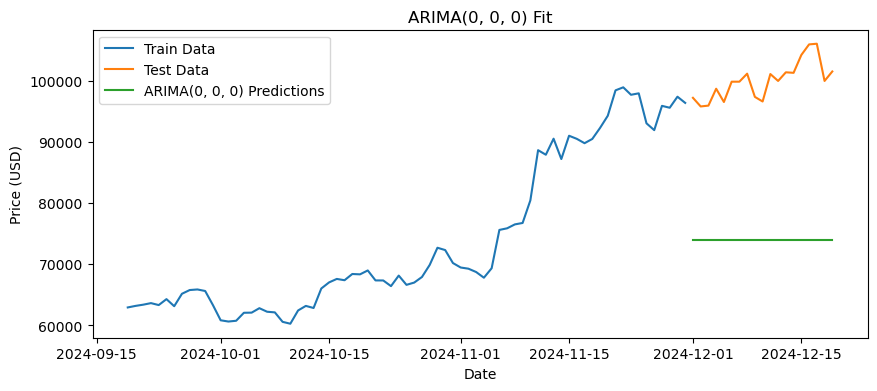

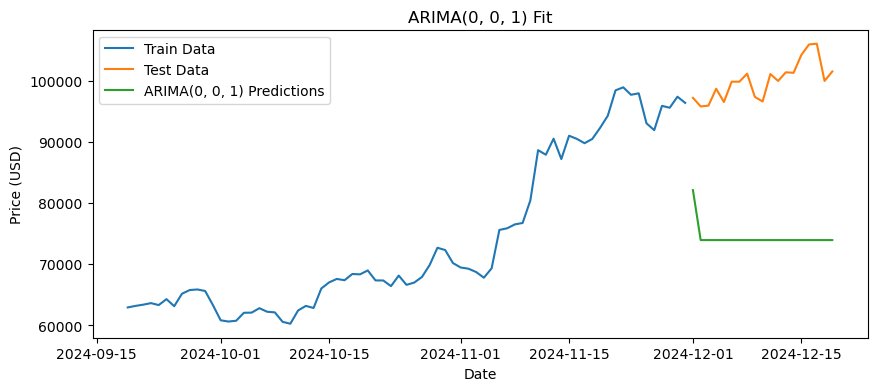

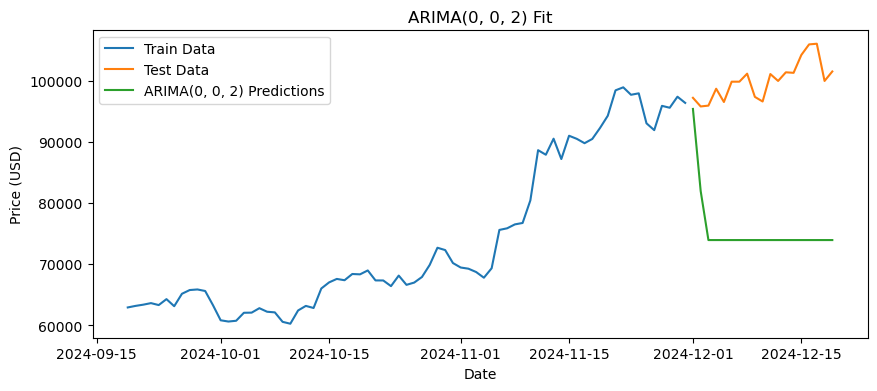

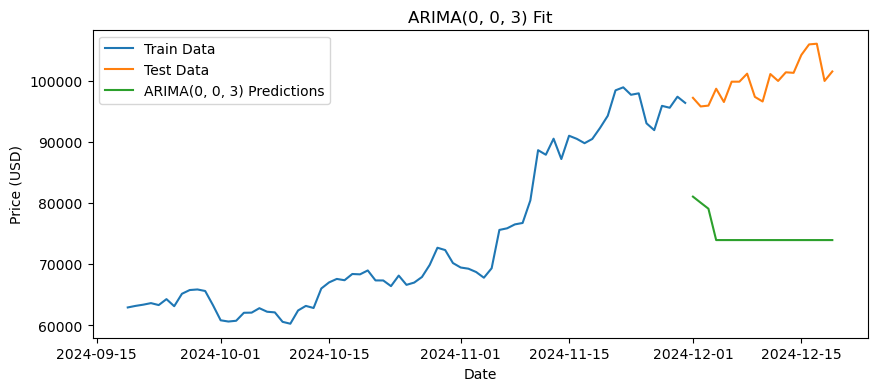

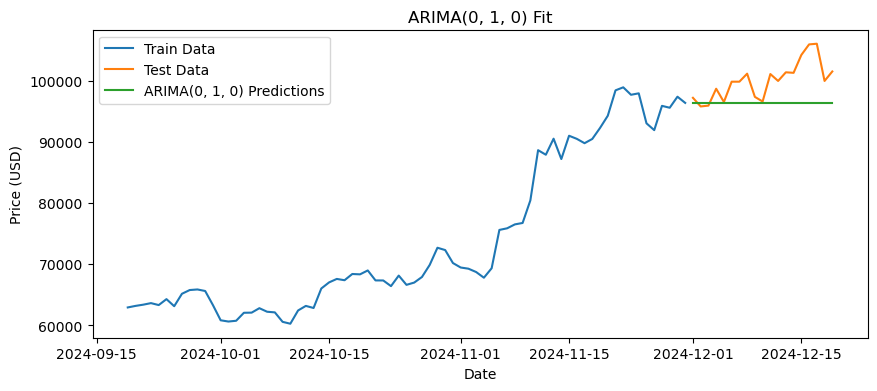

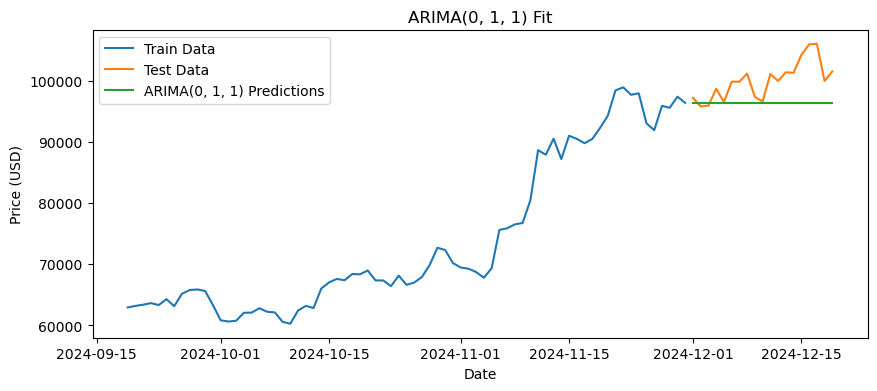

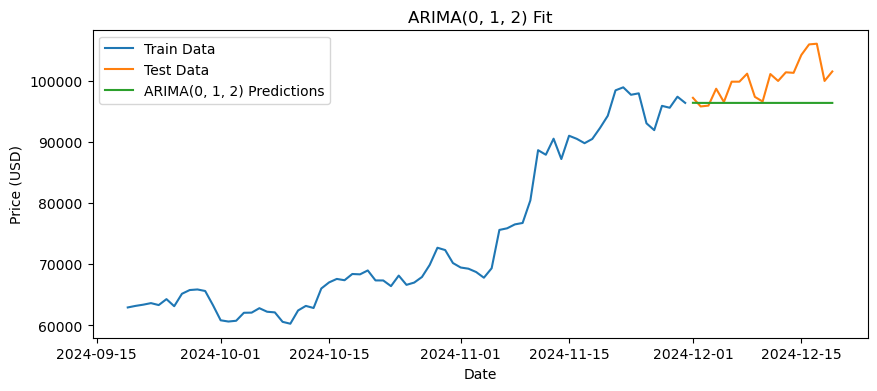

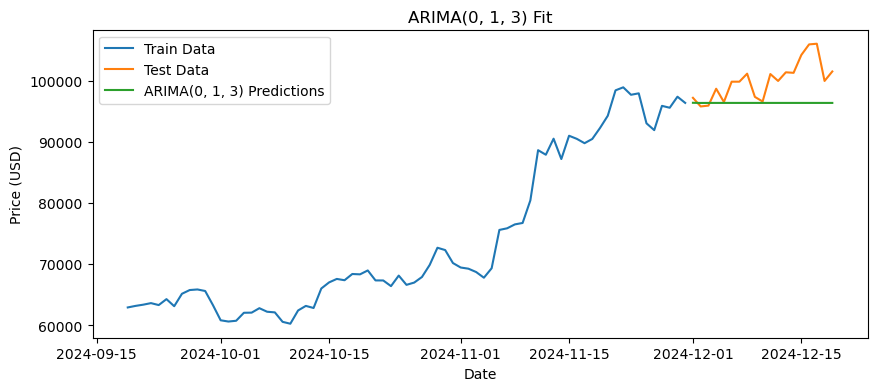

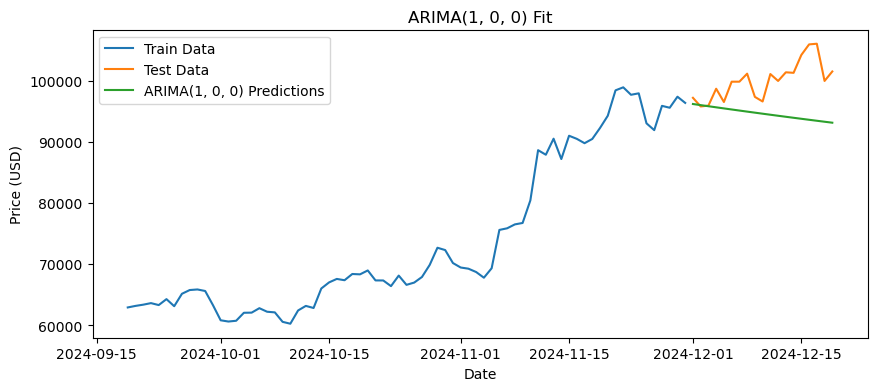

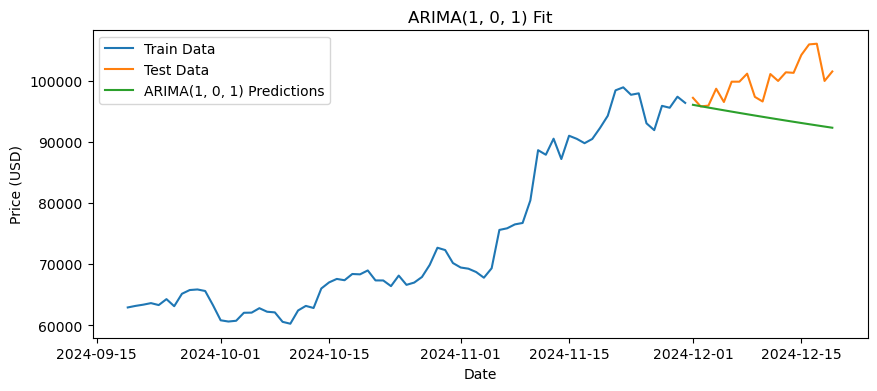

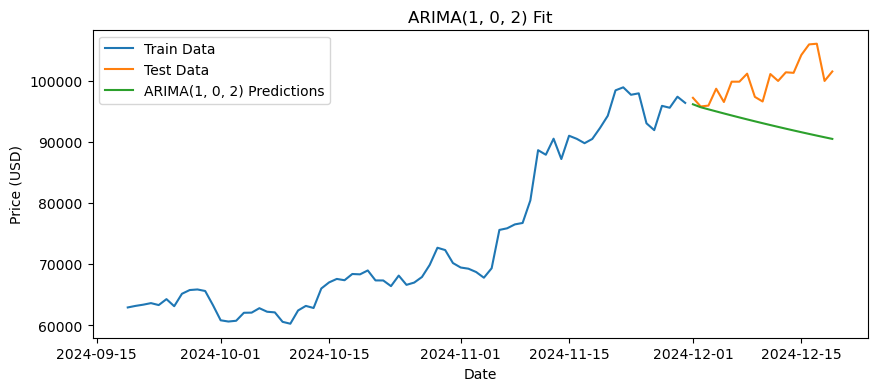

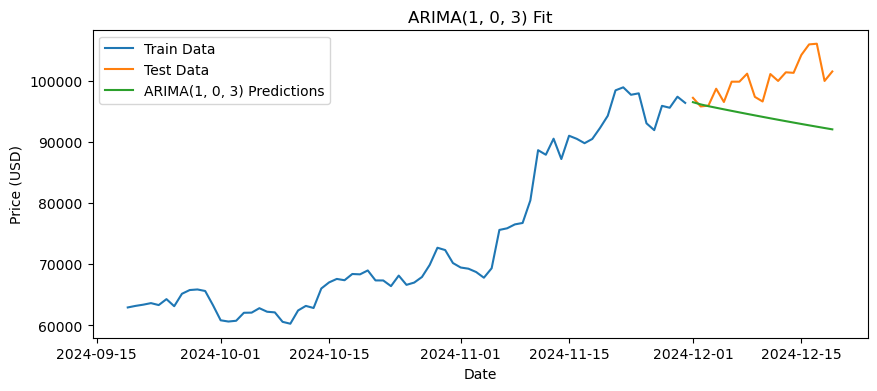

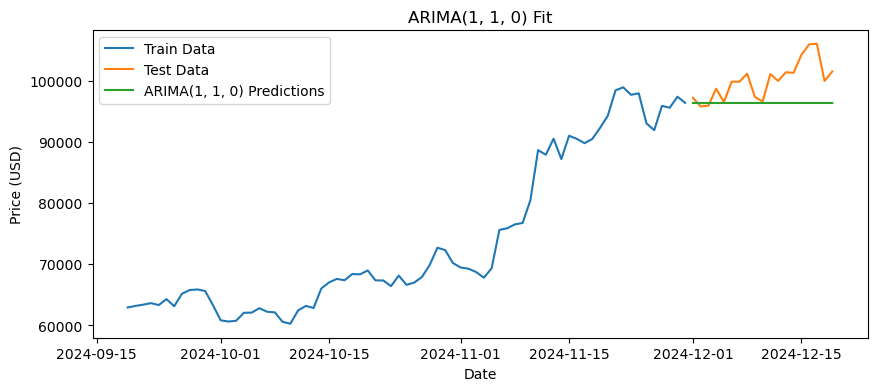

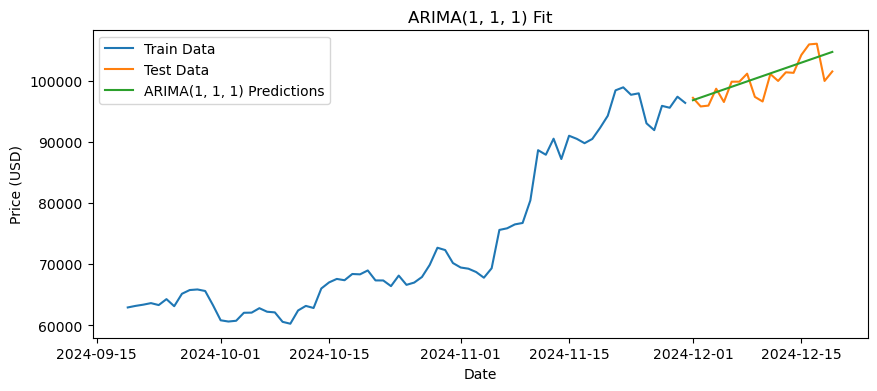

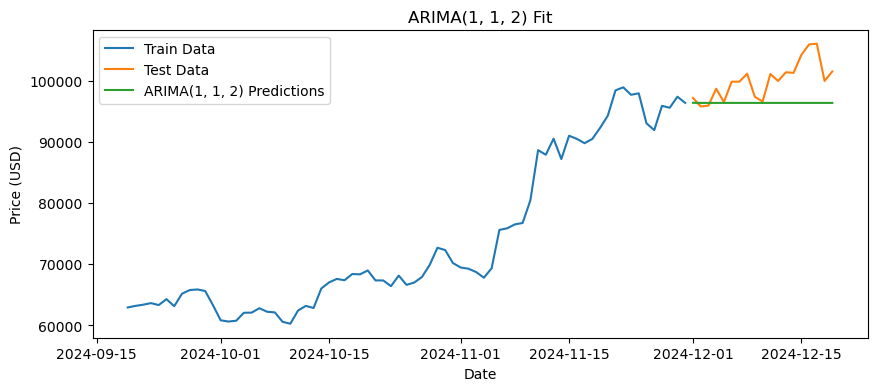

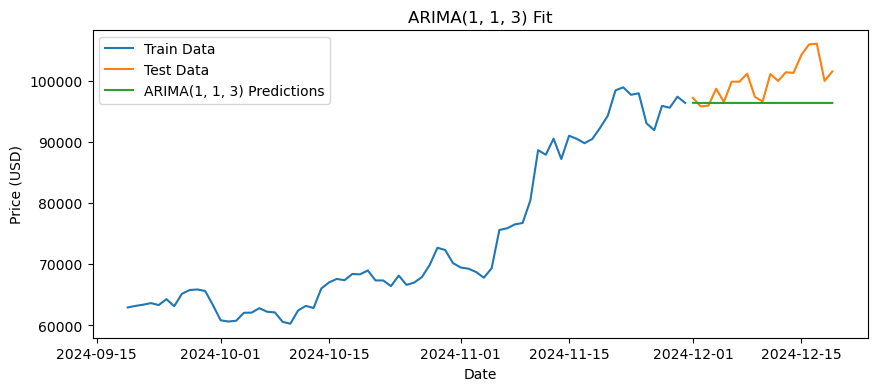

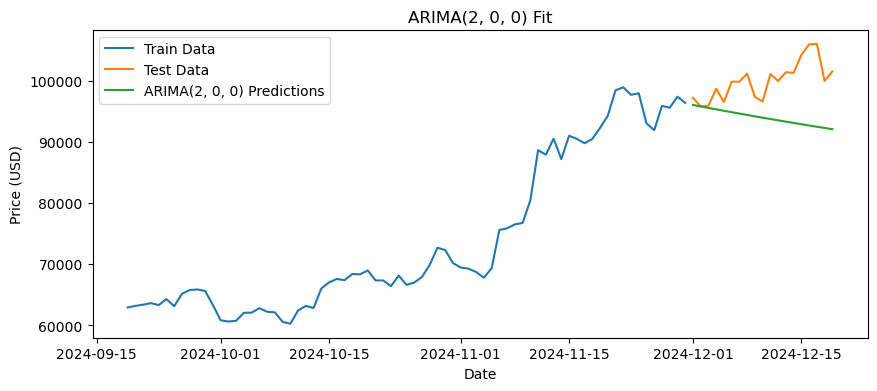

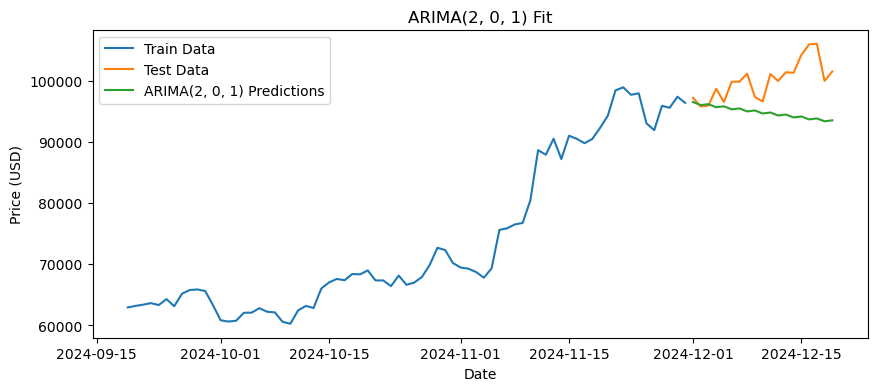

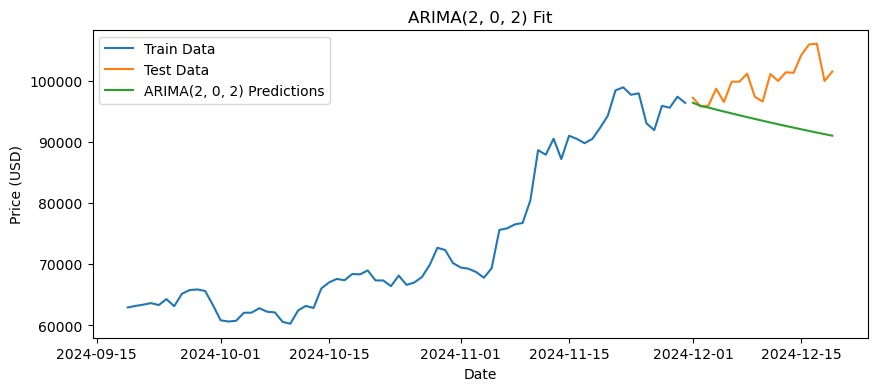

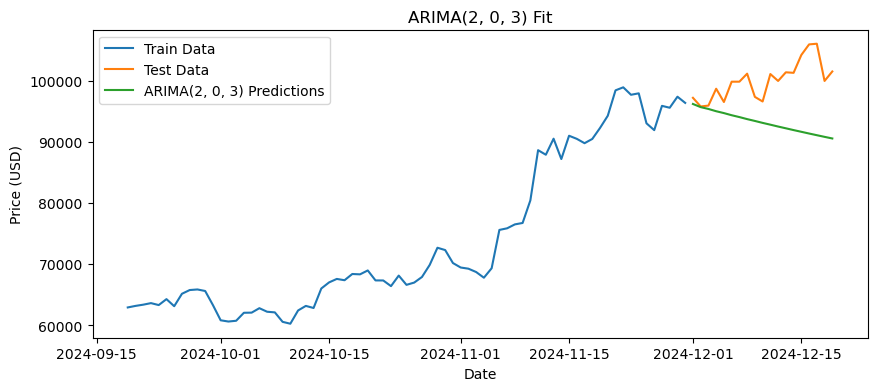

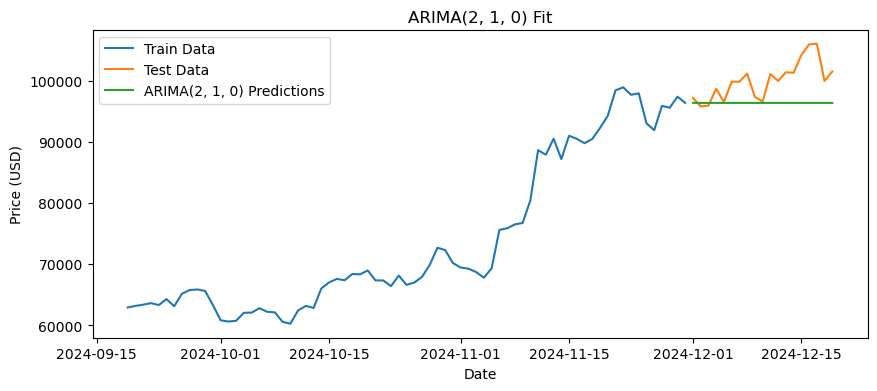

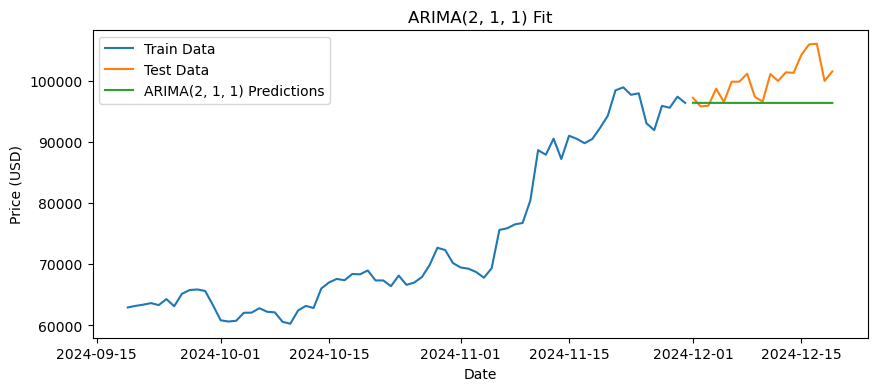

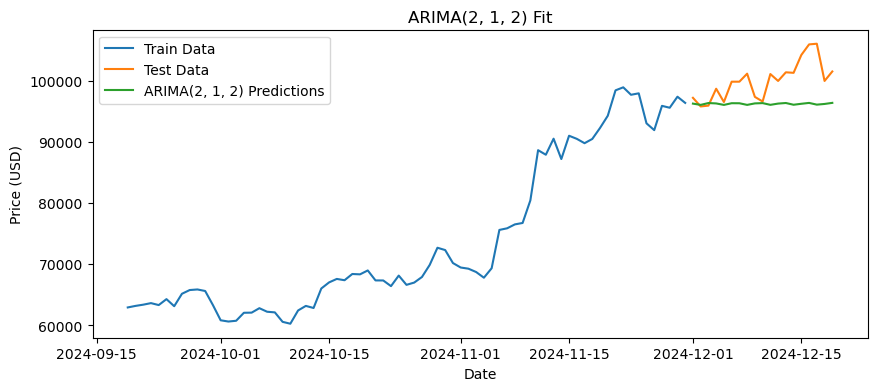

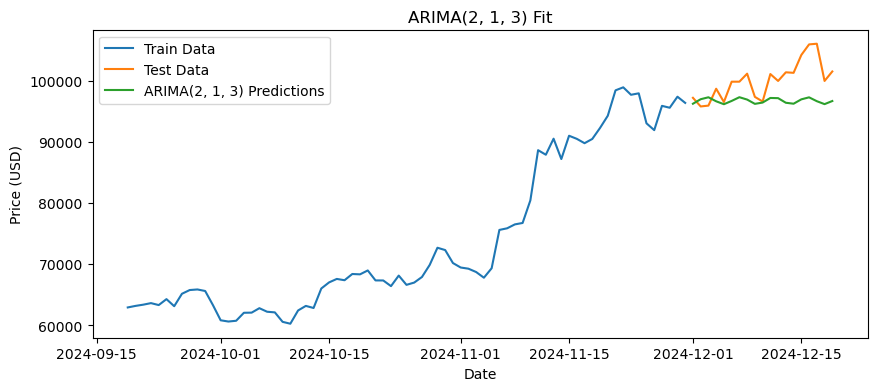

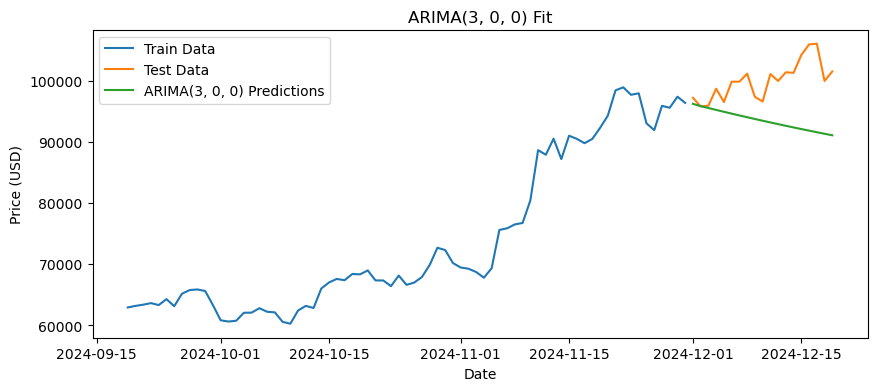

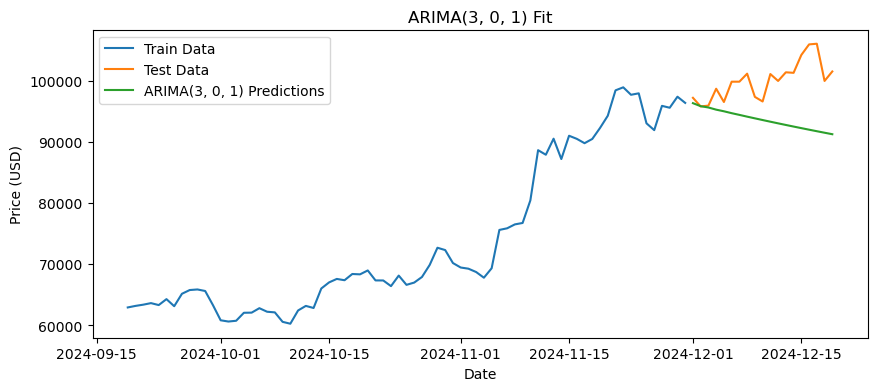

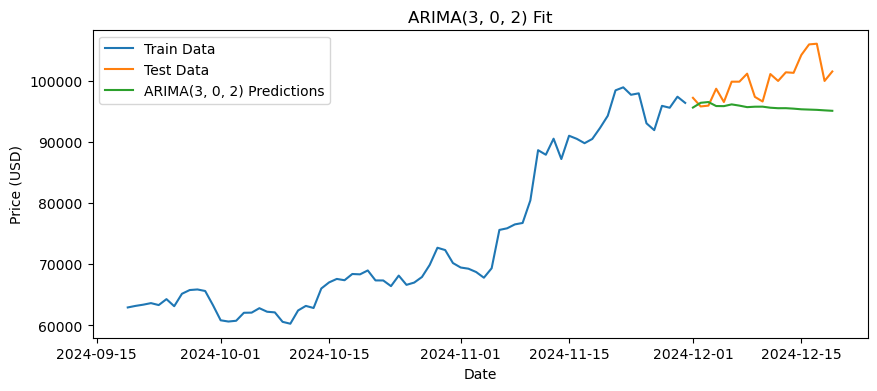

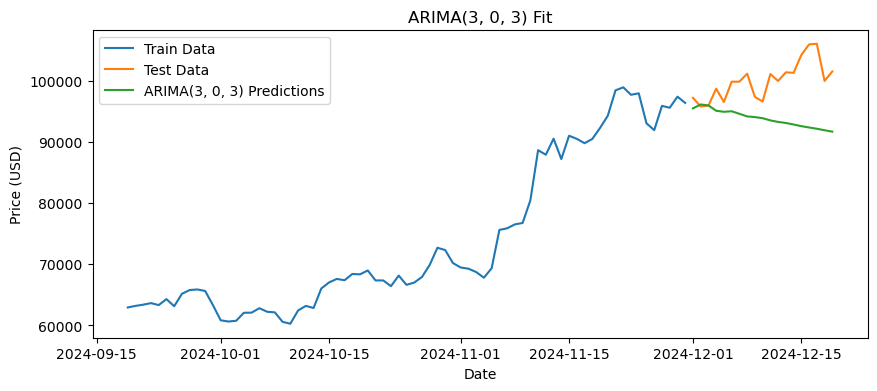

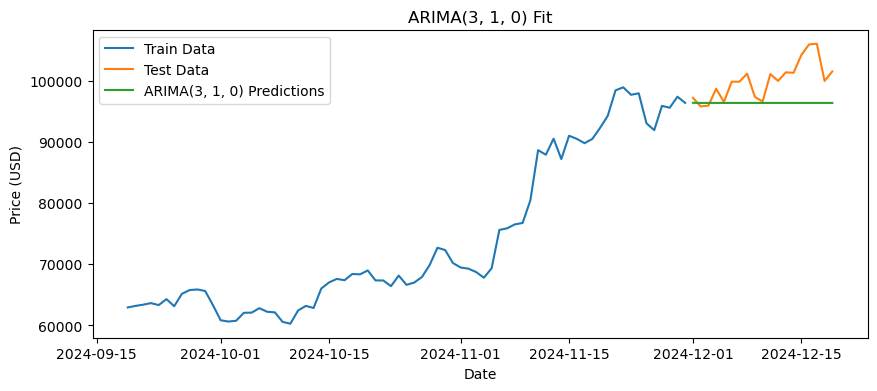

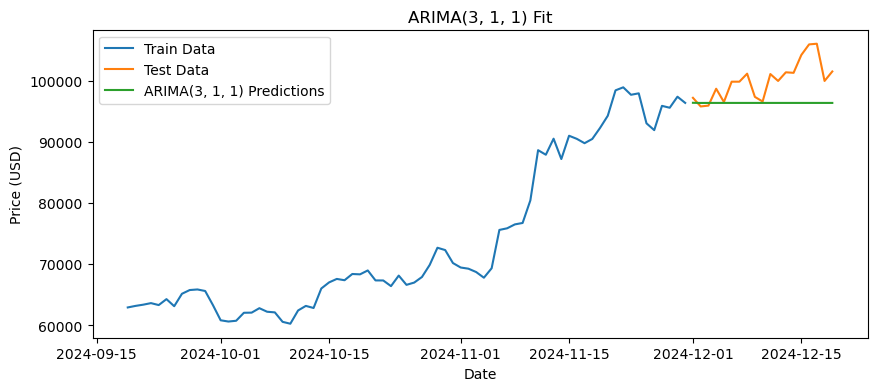

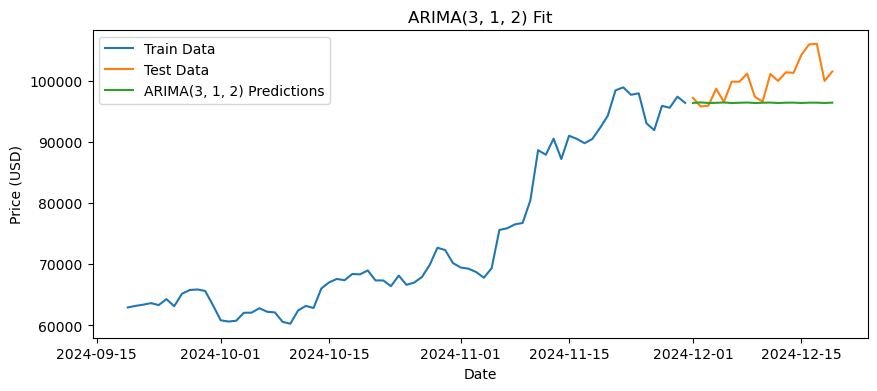

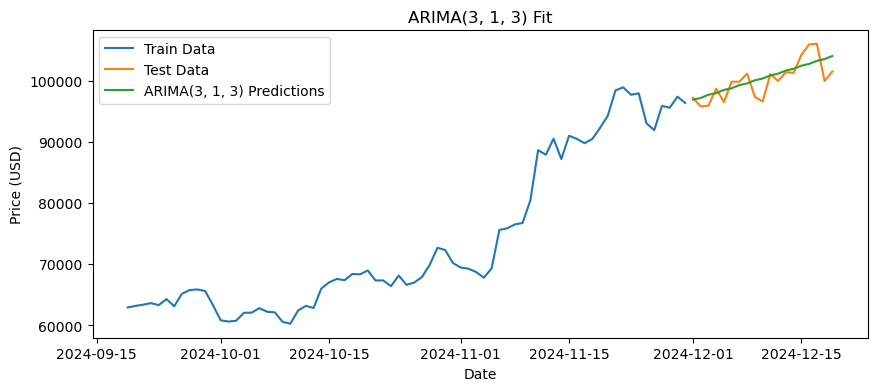

Best ARIMA order: (3, 1, 3), MSE: 4090857.956723345


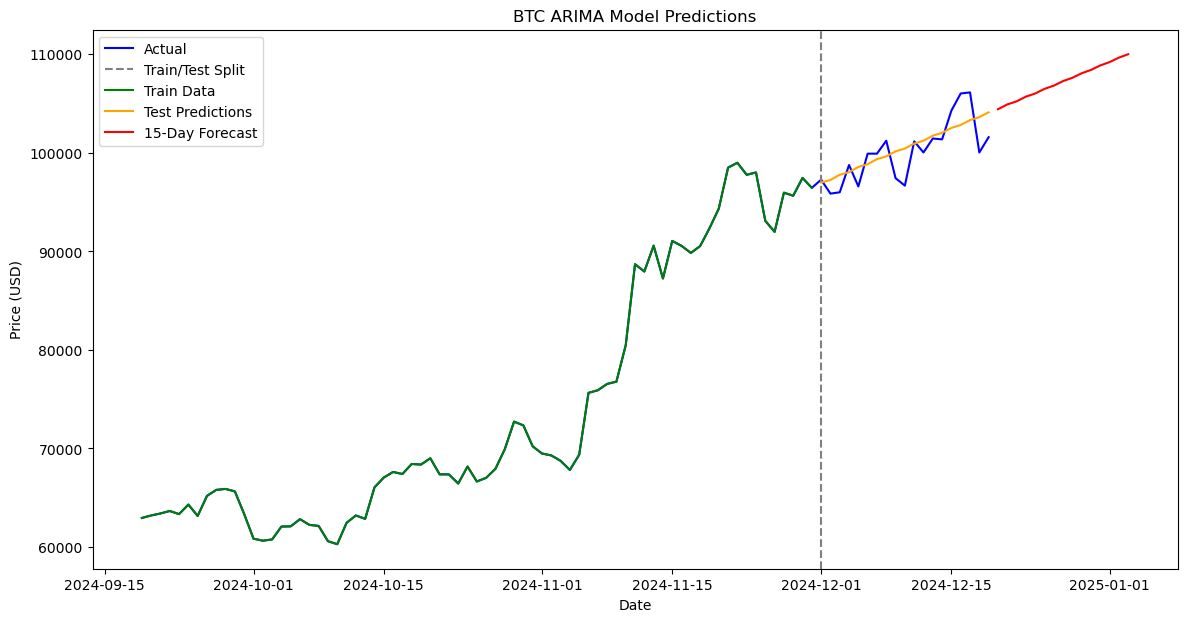

In [ ]:
import pandas as pd
import numpy as np
import yfinance as yf
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from itertools import product
import warnings

# Ignore warnings
warnings.filterwarnings("ignore")

# Step 1: Pull BTC data for the last 3 months
btc_data = yf.download('BTC-USD', period='3mo', interval='1d')
btc_data = btc_data[['Close']].dropna()

# Prepare train-test split (80% train, 20% test)
train_size = int(len(btc_data) * 0.8)
train, test = btc_data[:train_size], btc_data[train_size:]

# Step 2: ARIMA model tuning
p_values = range(0, 4)  # Define the range for ARIMA(p,d,q)
d_values = range(0, 2)
q_values = range(0, 4)

def evaluate_arima_model(train, test, arima_order):
    try:
        model = ARIMA(train, order=arima_order)
        model_fit = model.fit()
        predictions = model_fit.forecast(steps=len(test))
        mse = mean_squared_error(test, predictions)
        return mse, model_fit
    except:
        return float('inf'), None

results = []
for p, d, q in product(p_values, d_values, q_values):
    arima_order = (p, d, q)
    mse, model_fit = evaluate_arima_model(train['Close'], test['Close'], arima_order)
    results.append((arima_order, mse, model_fit))

    # Visualize each fit
    if model_fit is not None:
        plt.figure(figsize=(10, 4))
        plt.plot(train.index, train['Close'], label='Train Data')
        plt.plot(test.index, test['Close'], label='Test Data')
        plt.plot(test.index, model_fit.forecast(steps=len(test)), label=f'ARIMA{arima_order} Predictions')
        plt.title(f'ARIMA{arima_order} Fit')
        plt.xlabel('Date')
        plt.ylabel('Price (USD)')
        plt.legend()
        plt.show()

# Select the best model
best_order, best_mse, best_model = min(results, key=lambda x: x[1])
print(f"Best ARIMA order: {best_order}, MSE: {best_mse}")

# Step 3: Predict ahead for 15 days
forecast = best_model.forecast(steps=len(test) + 15)

# Plot the results
plt.figure(figsize=(14, 7))
plt.plot(btc_data.index, btc_data['Close'], label='Actual', color='blue')
plt.axvline(x=btc_data.index[train_size], color='gray', linestyle='--', label='Train/Test Split')

# Train/Test and Predictions
plt.plot(train.index, train['Close'], label='Train Data', color='green')
plt.plot(test.index, forecast[:len(test)], label='Test Predictions', color='orange')

# Future Predictions
future_index = pd.date_range(start=test.index[-1], periods=16, freq='D')[1:]
plt.plot(future_index, forecast[len(test):], label='15-Day Forecast', color='red')

plt.title('BTC ARIMA Model Predictions')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()


### 6. Streamlit App

In [ ]:
import pandas as pd
import numpy as np
import yfinance as yf
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from itertools import product
import warnings
import streamlit as st
from PIL import Image

# Ignore warnings
warnings.filterwarnings("ignore")

# Streamlit configuration
st.set_page_config(layout="wide")
st.markdown("<style>.main {padding-top: 0px;}</style>", unsafe_allow_html=True)

# Add images
st.sidebar.image("Pic1.png", use_column_width=True)
st.image("Pic2.png", use_column_width=True)

# Add main title
st.markdown("<h1 style='text-align: center; margin-top: -20px;'>ARIMA Forecasting Model</h1>", unsafe_allow_html=True)

# Sidebar inputs
st.sidebar.header("Model Parameters")
crypto_symbol = st.sidebar.text_input("Cryptocurrency Symbol", "BTC-USD")
prediction_ahead = st.sidebar.number_input("Prediction Days Ahead", min_value=1, max_value=30, value=15, step=1)
if st.sidebar.button("Predict"):

    # Step 1: Pull crypto data for the last 3 months
    btc_data = yf.download(crypto_symbol, period='3mo', interval='1d')
    btc_data = btc_data[['Close']].dropna()

    # Prepare train-test split (80% train, 20% test)
    train_size = int(len(btc_data) * 0.8)
    train, test = btc_data[:train_size], btc_data[train_size:]

    # Step 2: ARIMA model tuning
    p_values = range(0, 4)  # Define the range for ARIMA(p,d,q)
    d_values = range(0, 2)
    q_values = range(0, 4)

    def evaluate_arima_model(train, test, arima_order):
        try:
            model = ARIMA(train, order=arima_order)
            model_fit = model.fit()
            predictions = model_fit.forecast(steps=len(test))
            mse = mean_squared_error(test, predictions)
            return mse, model_fit
        except:
            return float('inf'), None

    results = []
    for p, d, q in product(p_values, d_values, q_values):
        arima_order = (p, d, q)
        mse, model_fit = evaluate_arima_model(train['Close'], test['Close'], arima_order)
        results.append((arima_order, mse, model_fit))

    # Select the best model
    best_order, best_mse, best_model = min(results, key=lambda x: x[1])
    forecast = best_model.forecast(steps=len(test) + prediction_ahead)

    # Latest close price and last predicted price
    latest_close_price = float(btc_data['Close'].iloc[-1])
    last_predicted_price = float(forecast[-1])

    # Centered layout for metrics
    col1, col2, col3 = st.columns([1, 2, 1])
    with col2:
        st.markdown(
            f"""
            <div style="display: flex; justify-content: space-around;">
                <div style="background-color: #d5f5d5; color: black; padding: 10px; border-radius: 10px; text-align: center;">
                    <h3>Latest Close Price</h3>
                    <p style="font-size: 20px;">${latest_close_price:,.2f}</p>
                </div>
                <div style="background-color: #d5f5d5; color: black; padding: 10px; border-radius: 10px; text-align: center;">
                    <h3>Price After {prediction_ahead} Days</h3>
                    <p style="font-size: 20px;">${last_predicted_price:,.2f}</p>
                </div>
            </div>
            """,
            unsafe_allow_html=True,
        )

    # Plot the results
    plt.figure(figsize=(14, 5))  # Adjusted height to make the plot shorter
    plt.plot(btc_data.index, btc_data['Close'], label='Actual', color='blue')
    plt.axvline(x=btc_data.index[train_size], color='gray', linestyle='--', label='Train/Test Split')

    # Train/Test and Predictions
    plt.plot(train.index, train['Close'], label='Train Data', color='green')
    plt.plot(test.index, forecast[:len(test)], label='Test Predictions', color='orange')

    # Future Predictions
    future_index = pd.date_range(start=test.index[-1], periods=prediction_ahead + 1, freq='D')[1:]
    plt.plot(future_index, forecast[len(test):], label=f'{prediction_ahead}-Day Forecast', color='red')

    plt.title(f'{crypto_symbol} ARIMA Model Predictions')
    plt.xlabel('Date')
    plt.ylabel('Price (USD)')
    plt.legend()
    st.pyplot(plt)


<function __main__.prepare_data(data, look_back=60)>